In [25]:
import numpy as np
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
# Load the digits dataset and train the model
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)

In [27]:
# Function to preprocess and predict the digit
def predict_drawn_digit(image):
    # Resize to 8x8 pixels and convert to grayscale
    image = image.resize((8, 8), Image.Resampling.LANCZOS).convert('L')
    # Invert colors to match the dataset's format
    image = ImageOps.invert(image)
    # Convert to numpy array
    digit_data = np.array(image)
    # Normalize pixel values to the range used in the training data
    digit_data = digit_data / 16.0
    digit_data = digit_data.reshape(1, -1)
    
    # Predict using the trained model
    predicted_digit = model.predict(digit_data)
    return predicted_digit[0]

# Function to handle drawing on the canvas
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill='black', width=10)
    draw.ellipse([x1, y1, x2, y2], fill='black')

# Function to predict the digit
def on_predict():
    digit = predict_drawn_digit(image)
    print(f"The predicted digit is: {digit}")
    # For visualization
    plt.imshow(np.array(image.resize((8, 8), Image.Resampling.LANCZOS).convert('L')), cmap=plt.cm.gray_r)
    plt.title(f"Predicted Digit: {digit}")
    plt.axis("Off")
    plt.show()

# Function to clear the canvas
def on_clear():
    canvas.delete("all")
    global image, draw
    image = Image.new('RGB', (200, 200), 'white')
    draw = ImageDraw.Draw(image)

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.0625 0.375  0.     0.     0.     0.     0.     0.25   0.8125
  1.     0.     0.     0.     0.     0.3125 0.4375 0.375  0.1875 0.
  0.     0.     0.     0.     0.     0.125  0.0625 0.     0.     0.
  0.     0.0625 0.     1.25   0.25   0.     0.     0.     0.     0.
  0.     0.625  0.125  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.    ]]
The predicted digit is: 9


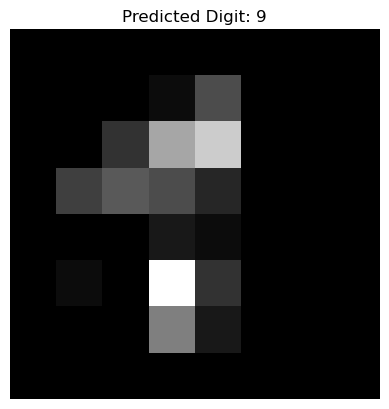

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.1875 0.375  0.75   0.125  0.     0.     0.     0.     0.1875 0.3125
  1.0625 0.9375 0.     0.     0.     0.     0.     0.     0.1875 0.5
  0.     0.     0.     0.     0.     0.     0.3125 0.1875 0.     0.
  0.     0.     0.     0.125  0.4375 0.     0.     0.     0.     0.25
  1.25   1.0625 0.9375 0.6875 0.     0.     0.     0.6875 1.4375 0.3125
  0.     0.1875 0.     0.    ]]
The predicted digit is: 9


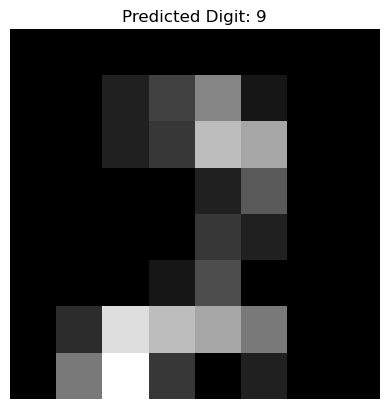

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.3125 0.4375 0.75   0.1875 0.     0.     0.     0.     0.125  0.1875
  0.875  0.1875 0.     0.     0.     0.     0.     0.0625 0.1875 0.
  0.     0.     0.     0.     0.     0.125  0.125  0.     0.     0.
  0.     0.     0.     0.4375 0.125  0.     0.     0.     0.     0.
  0.     0.875  0.0625 0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.    ]]
The predicted digit is: 9


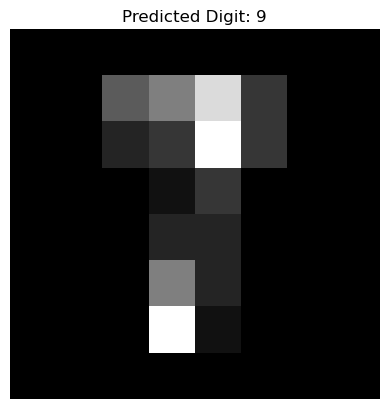

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.25   0.125  0.     0.     0.     0.     0.0625 0.     0.9375 1.125
  0.75   0.     0.     0.     0.     0.     0.4375 0.5625 0.9375 0.1875
  0.     0.     0.     0.     0.     0.     0.     0.5625 0.     0.
  0.     0.     0.     0.4375 0.625  1.     0.     0.     0.     0.
  0.     0.4375 0.3125 0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.    ]]
The predicted digit is: 9


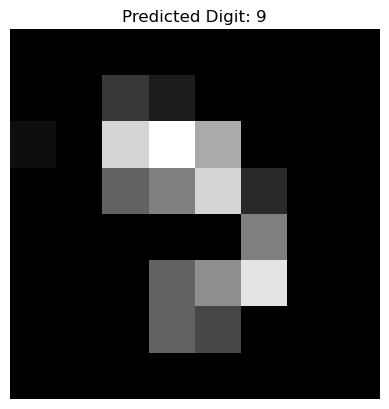

[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.125  0.6875 0.6875 0.375  0.     0.     0.     0.     0.4375 1.25
  0.1875 0.125  0.     0.     0.     0.     0.375  1.875  1.125  0.3125
  0.     0.     0.     0.     0.     0.3125 0.5    1.9375 0.1875 0.
  0.     0.     0.25   0.8125 0.6875 0.75   0.125  0.     0.     0.
  0.125  0.4375 0.0625 0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.    ]]
The predicted digit is: 9


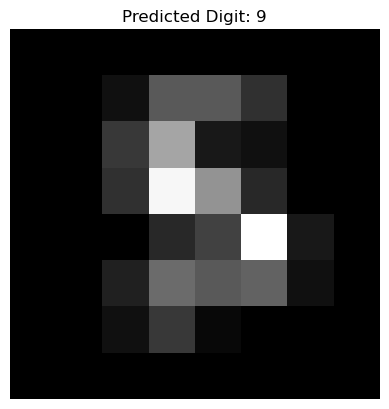

In [28]:
# Create the Tkinter window
root = tk.Tk()
root.title("Draw a Digit")

# Create a canvas widget
canvas = tk.Canvas(root, width=200, height=200, bg='white')
canvas.pack()

# Bind the paint function to the mouse motion event
canvas.bind("<B1-Motion>", paint)

# Create the predict and clear buttons
button_predict = tk.Button(root, text="Predict", command=on_predict)
button_predict.pack()

button_clear = tk.Button(root, text="Clear", command=on_clear)
button_clear.pack()

# Create an image to draw on
image = Image.new('RGB', (200, 200), 'white')
draw = ImageDraw.Draw(image)

# Run the Tkinter event loop
root.mainloop()